In [176]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
df = pd.read_csv('premierleague.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4070 entries, 0 to 4069
Columns: 114 entries, Unnamed: 0 to performance_acum_away
dtypes: float64(100), int64(7), object(7)
memory usage: 3.5+ MB


C:\Users\fadhi\AppData\Local\Temp\ipykernel_9124\4190395143.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [177]:
df = df[['date','season','home_team','away_team', 'goal_home_ft','goal_away_ft','home_passes','away_passes', 'home_possession','away_possession','home_shots','home_shots_on_target','away_shots','away_shots_on_target']]
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
df = df.reset_index(drop=True)
df['home_win'] = [ -1 for i in range(len(df['home_team']))]
df['away_win'] = [ -1 for i in range(len(df['away_team']))]


for i in range(len(df['away_team'])): 
    if df.iloc[i,4] > df.iloc[i, 5]: df.iloc[i, 14] = 1
    elif df.iloc[i,4] < df.iloc[i, 5]: df.iloc[i, 15] = 1
    else : df.iloc[i,14] = 0; df.iloc[i,15] = 0
df.to_csv('pl.csv')


In [178]:
df.describe()

,goal_home_ft,goal_away_ft,home_passes,away_passes,home_possession,away_possession,home_shots,home_shots_on_target,away_shots,away_shots_on_target,home_win,away_win
count,4070.000000,4070.000000,4070.000000,4070.000000,4070.000000,4070.000000,4070.000000,4070.000000,4070.000000,4070.000000,4070.000000,4070.000000
mean,1.535627,1.200737,450.428993,430.422604,51.230393,48.769607,14.545455,4.820885,11.694103,3.949140,0.147420,-0.147420
std,1.304315,1.175965,125.676926,120.259510,11.529756,11.529756,5.768558,2.633621,4.893512,2.298582,0.856006,0.856006
min,0.000000,0.000000,176.000000,169.000000,18.000000,17.100000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,1.000000,0.000000,360.000000,341.000000,43.100000,40.400000,10.000000,3.000000,8.000000,2.000000,-1.000000,-1.000000
50%,1.000000,1.000000,433.000000,416.000000,51.100000,48.900000,14.000000,5.000000,11.000000,4.000000,0.000000,0.000000
75%,2.000000,2.000000,527.000000,504.000000,59.600000,56.900000,18.000000,6.000000,15.000000,5.000000,1.000000,1.000000
max,9.000000,9.000000,1015.000000,976.000000,82.900000,82.000000,44.000000,17.000000,32.000000,15.000000,1.000000,1.000000


<AxesSubplot: title={'center': 'liverpool home match stats'}, xlabel='jumlah pertandingan', ylabel='Win or Lose'>

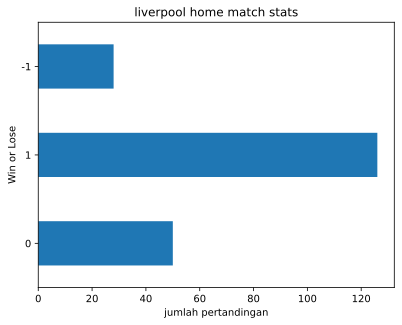

In [179]:
df.loc[df["home_team"] == 'Liverpool','home_win'].value_counts(sort=False).plot(kind='barh',title='liverpool home match stats', xlabel='jumlah pertandingan', ylabel='Win or Lose')

<AxesSubplot: title={'center': 'liverpool away match stats'}, xlabel='jumlah pertandingan', ylabel='Win or Lose'>

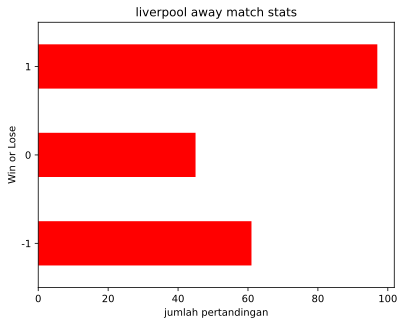

In [180]:

df.loc[df["away_team"] == 'Liverpool','away_win'].value_counts(sort=False).plot(kind='barh',title='liverpool away match stats', xlabel='jumlah pertandingan', ylabel='Win or Lose', color='red')

<AxesSubplot: >

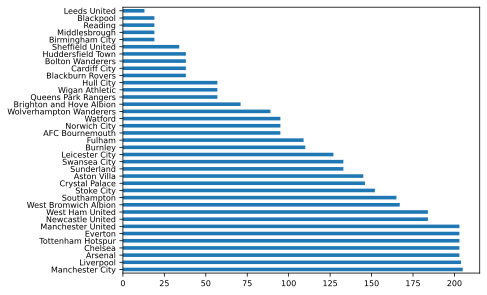

In [181]:
#data team yang pernah bermain di premier league
df.loc[:, 'home_team'].value_counts().plot(kind='barh',fontsize=8)

   home_win  away_win  counts
0         1        -1    1835
1        -1         1    1235
2         0         0    1000


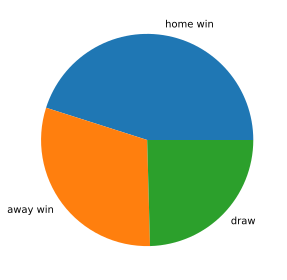

In [182]:
#home_win dengan away_win
a = df.loc[:, ['home_win','away_win']].value_counts().to_frame('counts').reset_index()
print(a)
plt.pie(a['counts'],labels=['home win','away win','draw'])
plt.show()

In [183]:
kolom = ['season', 'home_team','away_team','goal_home_ft','goal_away_ft','home_win','away_win']

In [184]:
df['home_win'] = [ 0 for i in range(len(df['home_team']))]
df['away_win'] = [ 0 for i in range(len(df['away_team']))]


for i in range(len(df['away_team'])): 
    if df.iloc[i,4] > df.iloc[i, 5]: df.iloc[i, 14] = 1
    elif df.iloc[i,4] < df.iloc[i, 5]: df.iloc[i, 15] = 1
    else : df.iloc[i,14] = 0; df.iloc[i,15] = 0

<AxesSubplot: xlabel='season'>

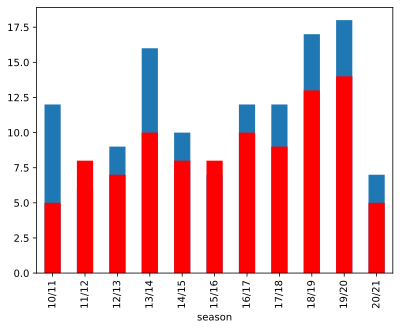

In [185]:
Liverpool_home = df.loc[df['home_team'] == 'Liverpool', kolom]
Liverpool_home.groupby('season')['home_win'].sum().plot(kind='bar')
Liverpool_away = df.loc[df['away_team'] == 'Liverpool', kolom]
Liverpool_away.groupby('season')['away_win'].sum().plot(kind='bar',color='red')


<AxesSubplot: xlabel='season'>

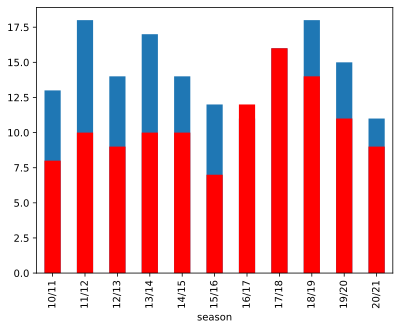

In [186]:
Mancity_home = df.loc[df['home_team'] == 'Manchester City', kolom]
Mancity_home.groupby('season')['home_win'].sum().plot(kind='bar')
Mancity_away= df.loc[df['away_team'] == 'Manchester City', kolom]
Mancity_away.groupby('season')['away_win'].sum().plot(kind='bar',color='red')



<AxesSubplot: xlabel='season'>

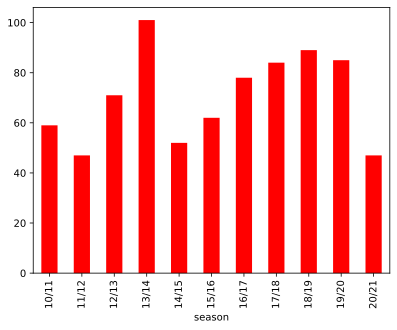

In [187]:
Liverpool_away = Liverpool_away.rename({'home_team':'home_team_a','away_team':'away_team_a','goal_home_ft':'goal_home_ft_a','goal_away_ft':'goal_away_ft_a','home_win':'home_win_a','away_win':'away_win_a'}, axis=1)
Liverpool_merged = pd.concat([Liverpool_home, Liverpool_away])
Liverpool_merged = Liverpool_merged.fillna(0)
Liverpool_merged['win_count'] = pd.eval("Liverpool_merged.goal_home_ft + Liverpool_merged.goal_away_ft_a")
Liverpool_merged.tail()
Liverpool_merged.groupby('season')['win_count'].sum().plot(kind='bar',color='red')

In [192]:
df_home = df.loc[:, kolom]
df_away = df.loc[:, kolom]
df_away = df_away.rename({'home_team':'home_team_a','away_team':'away_team_a','goal_home_ft':'goal_home_ft_a','goal_away_ft':'goal_away_ft_a','home_win':'home_win_a','away_win':'away_win_a'}, axis=1)


,date,season,home_team,away_team,goal_home_ft,goal_away_ft,home_passes,away_passes,home_possession,away_possession,home_shots,home_shots_on_target,away_shots,away_shots_on_target,home_win,away_win
0,2010-08-14,10/11,Aston Villa,West Ham United,3,0,395.0,313.0,56.8,43.2,27.0,5.0,14.0,1.0,1,0
1,2010-08-14,10/11,Bolton Wanderers,Fulham,0,0,336.0,394.0,46.5,53.5,11.0,5.0,15.0,4.0,0,0
2,2010-08-14,10/11,Chelsea,West Bromwich Albion,6,0,592.0,394.0,59.5,40.5,19.0,12.0,11.0,1.0,1,0
3,2010-08-14,10/11,Sunderland,Birmingham City,2,2,304.0,386.0,44.1,55.9,9.0,2.0,13.0,6.0,0,0
4,2010-08-14,10/11,Tottenham Hotspur,Manchester City,0,0,374.0,626.0,39.2,60.8,21.0,8.0,14.0,2.0,0,0


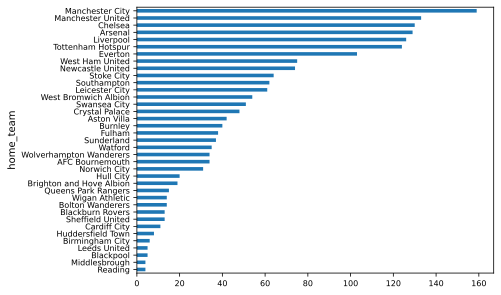

In [193]:

df.groupby('home_team')['home_win'].sum().sort_values().plot(kind='barh',fontsize=8)
df.head()